In [84]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [85]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [86]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [87]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [88]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.26s | val loss 0.306 | valid accuracy 0.296 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.24s | val loss 0.125 | valid accuracy 0.830 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.23s | val loss 0.087 | valid accuracy 0.865 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.23s | val loss 0.073 | valid accuracy 0.880 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.23s | val loss 0.066 | valid accuracy 0.890 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.22s | val loss 0.061 | valid accuracy 0.896 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.23s | val loss 0.057 | valid accuracy 0.900 |
----------------------------------

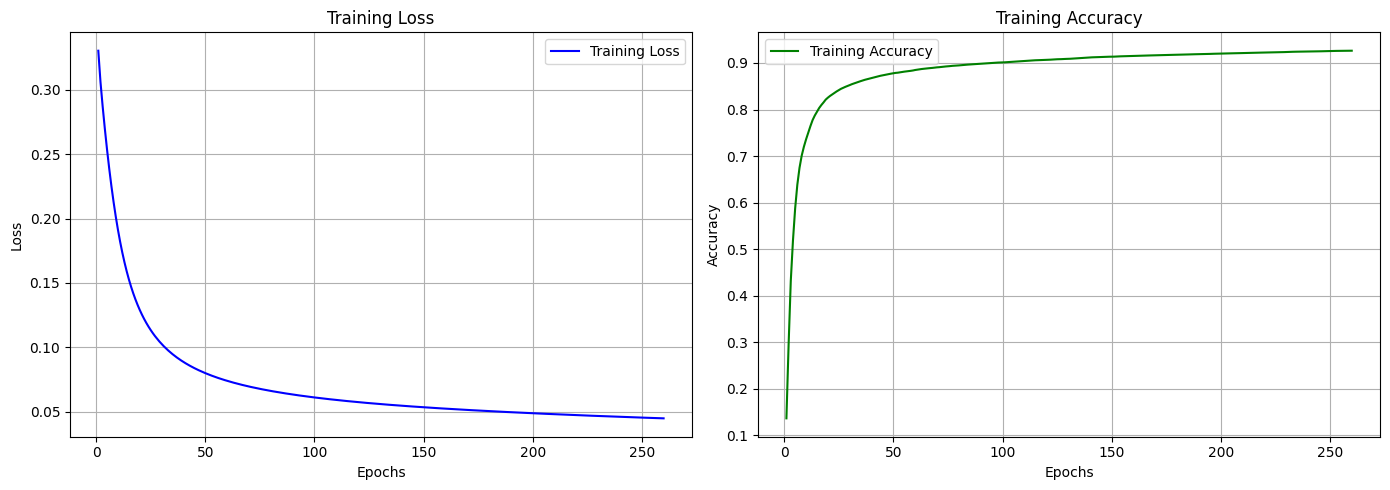

In [89]:
plot_training_history(loss, acc)

In [90]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.920952380952381


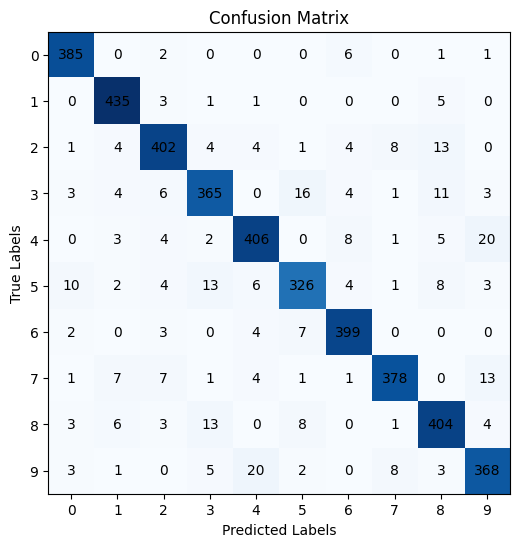

In [91]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Setup NN

In [92]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [93]:
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.40s | val loss 0.287 | valid accuracy 0.459 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.23s | val loss 0.058 | valid accuracy 0.896 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.25s | val loss 0.040 | valid accuracy 0.930 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.27s | val loss 0.032 | valid accuracy 0.943 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.30s | val loss 0.027 | valid accuracy 0.952 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.26s | val loss 0.023 | valid accuracy 0.960 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.27s | val loss 0.021 | valid accuracy 0.965 |
----------------------------------

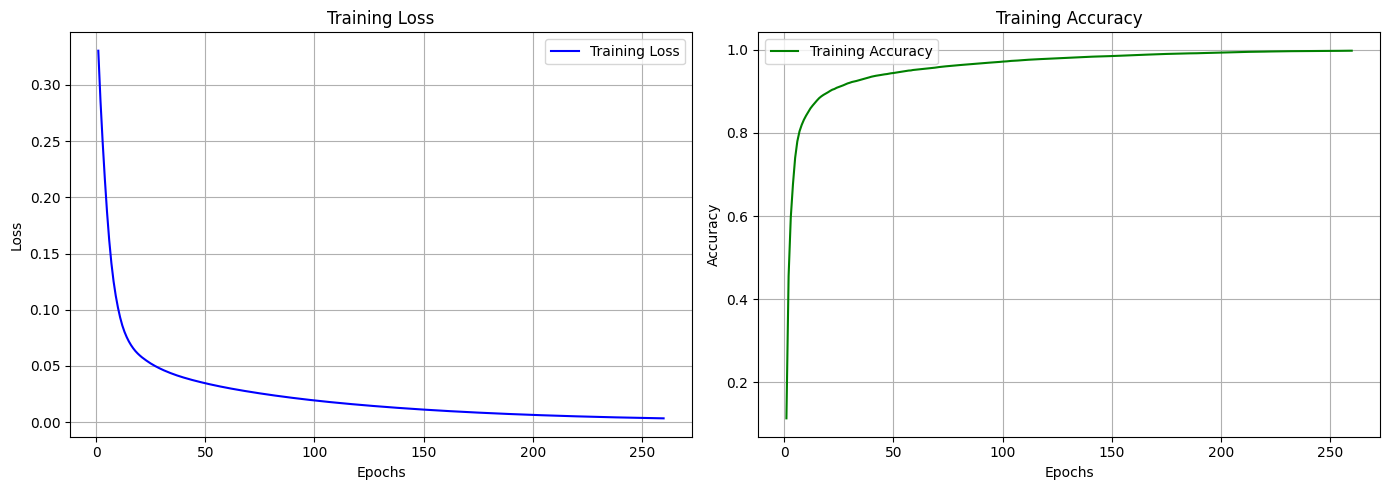

In [94]:
plot_training_history(loss, acc)

In [95]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9721428571428572


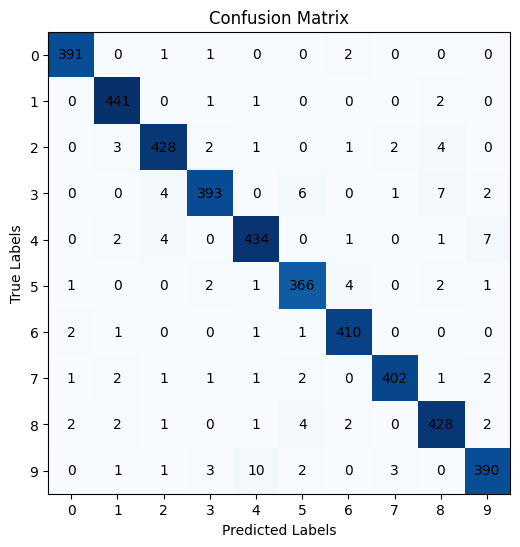

In [96]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

## Fashion MNIST Data

### Load Data

In [97]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [98]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Split Data

In [99]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [100]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [101]:
optimizer = SGDOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.07s | val loss 0.338 | valid accuracy 0.194 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.07s | val loss 0.256 | valid accuracy 0.497 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.15s | val loss 0.213 | valid accuracy 0.611 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.05s | val loss 0.188 | valid accuracy 0.639 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.07s | val loss 0.172 | valid accuracy 0.658 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.07s | val loss 0.160 | valid accuracy 0.674 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.20s | val loss 0.152 | valid accuracy 0.690 |
----------------------------------

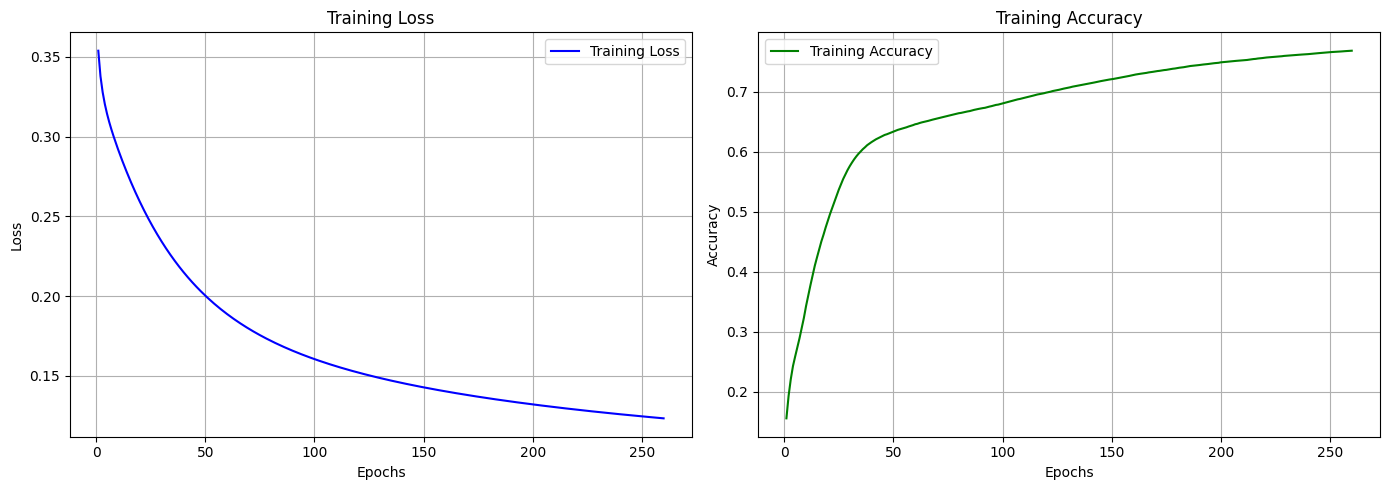

In [102]:
plot_training_history(loss, acc)

In [103]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7775714285714286


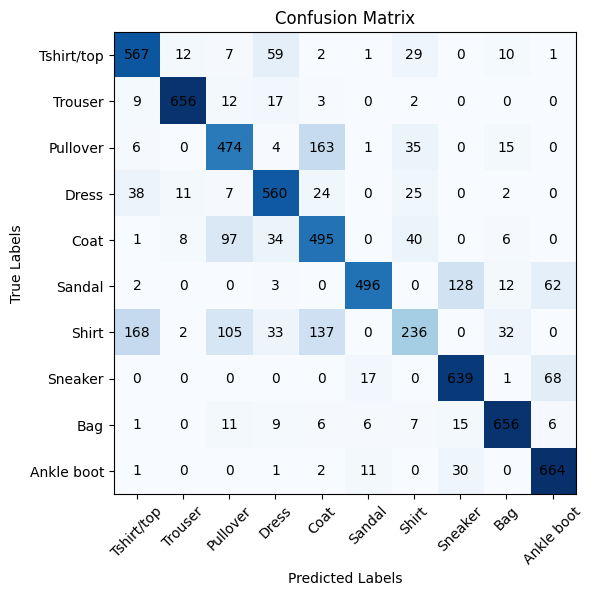

In [104]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)

#### Setup NN

In [105]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [106]:
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.15s | val loss 0.281 | valid accuracy 0.315 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.07s | val loss 0.098 | valid accuracy 0.806 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.14s | val loss 0.081 | valid accuracy 0.838 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.09s | val loss 0.073 | valid accuracy 0.853 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.07s | val loss 0.068 | valid accuracy 0.862 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.08s | val loss 0.064 | valid accuracy 0.870 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.07s | val loss 0.062 | valid accuracy 0.874 |
----------------------------------

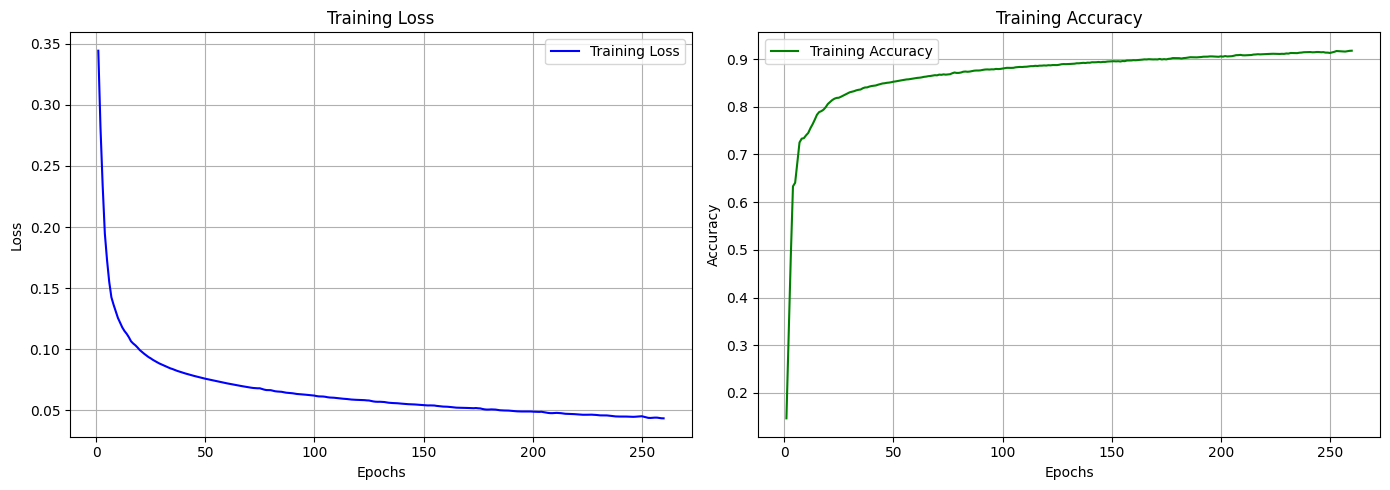

In [107]:
plot_training_history(loss, acc)

In [108]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8945714285714286


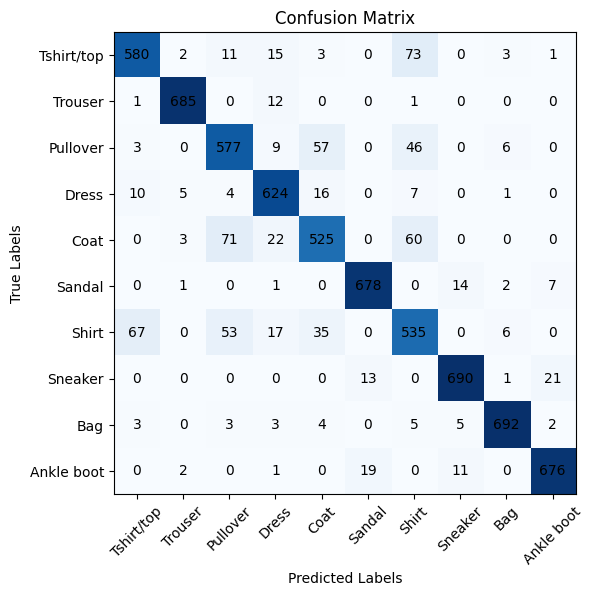

In [109]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)